In [1]:
# Packages
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

/home/fpalacios/miniconda3/envs/diplodatos-ayv/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/fpalacios/miniconda3/envs/diplodatos-ayv/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
# Plot settings
sns.set_context('notebook') 
sns.set_style('ticks')
red='#D62728'
blue='#1F77B4'
%matplotlib inline

In [3]:
plt.rcParams['figure.figsize'] = [15, 10]

Levantar los datos desde el archivo dataset/Telefonia_movil.csv. Los mismos fueron extraídos de http://datosabiertos.enacom.gob.ar/visualizations/29890/trafico-de-suscriptores-de-telefonia-movil-miles-de-minutos/ 

In [47]:
data=pd.read_csv('datasets/Telefonia_movil.csv', dayfirst=True, thousands ='.')


Explorar los datos, visualizarlos

In [48]:
data.tail()

,Año,Trimestre,Minutos pospago salientes (miles),Minutos prepago salientes (miles),Total de minutos salientes (miles),Periodo
17,2017,2,15315167,6293563,21608730,Abr-Jun 2017
18,2017,3,15106275,6308373,21414647,Jul-Sept 2017
19,2017,4,14164552,5380710,19545262,Oct-Dic 2017
20,2018,1,13851254,5958717,19809971,Ene-Mar 2018
21,2018,2,14388755,6290155,20678910,Abr-Jun 2018


In [53]:
data.describe()

,Año,Trimestre,Minutos pospago salientes (miles),Minutos prepago salientes (miles),Total de minutos salientes (miles)
count,22.000000,22.000000,2.200000e+01,2.200000e+01,2.200000e+01
mean,2015.272727,2.409091,1.209691e+07,6.604273e+06,1.870118e+07
std,1.638287,1.140555,2.077349e+06,5.251805e+05,1.990543e+06
min,2013.000000,1.000000,8.785943e+06,5.380710e+06,1.536806e+07
25%,2014.000000,1.250000,1.044198e+07,6.291007e+06,1.735731e+07
50%,2015.000000,2.000000,1.164553e+07,6.580968e+06,1.883452e+07
75%,2016.750000,3.000000,1.408623e+07,7.100940e+06,1.974379e+07
max,2018.000000,4.000000,1.596076e+07,7.335154e+06,2.289966e+07


In [49]:
data.index = pd.PeriodIndex(data['Año'].astype(str) +'Q' + data['Trimestre'].astype(str), freq='Q')

In [51]:
data.tail()

,Año,Trimestre,Minutos pospago salientes (miles),Minutos prepago salientes (miles),Total de minutos salientes (miles),Periodo
2017Q2,2017,2,15315167,6293563,21608730,Abr-Jun 2017
2017Q3,2017,3,15106275,6308373,21414647,Jul-Sept 2017
2017Q4,2017,4,14164552,5380710,19545262,Oct-Dic 2017
2018Q1,2018,1,13851254,5958717,19809971,Ene-Mar 2018
2018Q2,2018,2,14388755,6290155,20678910,Abr-Jun 2018


In [62]:
y=data['Minutos pospago salientes (miles)']

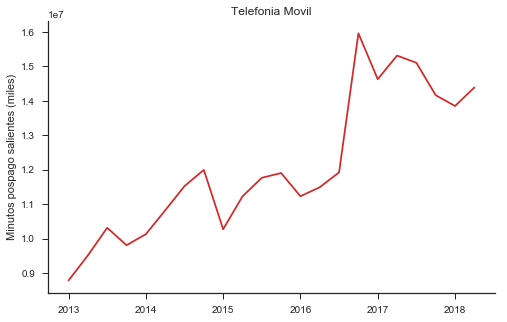

In [76]:
fig, ax= plt.subplots(figsize=(8,5))
y.plot(color=red)
ax.set_xlabel('')
ax.set_ylabel('Minutos pospago salientes (miles)')
ax.set_title('Telefonia Movil')
ax.set_xticks([], minor=True) # I prefer to remove the minor ticks for a cleaner plot
sns.despine()
plt.show()

In [64]:
y.describe().round(2)

count          22.00
mean     12096907.36
std       2077348.52
min       8785943.00
25%      10441978.75
50%      11645527.50
75%      14086227.50
max      15960765.00
Name: Minutos pospago salientes (miles), dtype: float64

## Random walk

In [65]:
h = 4
test=pd.period_range(start=y.index[-1]+1, periods=h, freq='Q')
pred=pd.Series(np.repeat(y.iloc[-1], h), index=test) # the forecast repeats the last observed values h times
pred

2018Q3    14388755
2018Q4    14388755
2019Q1    14388755
2019Q2    14388755
Freq: Q-DEC, dtype: int64

In [66]:
resid=y-y.shift(1) # the shift lags the series by one period
sigma = resid.std()
round(sigma,3)

1139932.612

In [67]:
intv = pd.concat([pred-stats.norm.ppf(0.975)*sigma*np.sqrt(np.arange(1,h+1)),
                   pred+stats.norm.ppf(0.975)*sigma*np.sqrt(np.arange(1,h+1))], axis=1)
intv.round(3)

,0,1
2018Q3,1.215453e+07,1.662298e+07
2018Q4,1.122908e+07,1.754843e+07
2019Q1,1.051896e+07,1.825855e+07
2019Q2,9.920301e+06,1.885721e+07


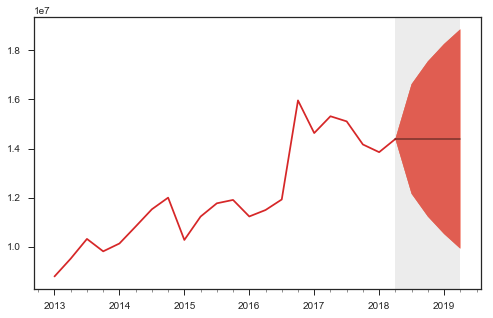

In [73]:
from plotting import fanchart

point_pred = (intv[0]+intv[1])/2

fig, ax = fanchart(y['2013':],point_pred,intv,intv,intv)

plt.show()

In [136]:
model_ses = sm.tsa.SimpleExpSmoothing(y).fit()
fitted_ses = model_ses.fittedvalues
# model_ses.summary() # summary isn't implemented in 0.9, looks it'll be avaible in 0.10
alpha_ses = model_ses.model.params['smoothing_level']
mse_ses = sm.tools.eval_measures.mse(y,fitted_ses)
# loglik_ses = model_ses.model.loglike(model_ses.model.params) # NotImplementedError
aic_ses = model_ses.aic
bic_ses = model_ses.bic
print(' Smoothing parameter: alpha  {0:.3f}'.format(alpha_ses))
print(' In-sample fit:')
print(' MSE               {0:.3f}'.format(mse_ses))
print(' AIC               {0:.3f}'.format(aic_ses))
print(' BIC               {0:.3f}'.format(bic_ses))

 Smoothing parameter: alpha  0.790
 In-sample fit:
 MSE               1199115355809.498
 AIC               615.877
 BIC               618.059


In [74]:
N = len(y)
loglik_ses=-(N/2)*(1+np.log(2*np.pi))-(N/2)*np.log(mse_ses)
aic_ses=-2*loglik_ses+2*3
bic_ses=-2*loglik_ses+np.log(N)*3
print(' Log-likelihood    %.3f' % (loglik_ses))
print(' AIC               {0:.3f}'.format(aic_ses))
print(' BIC               {0:.3f}'.format(bic_ses))

 Log-likelihood    -337.155
 AIC               680.311
 BIC               683.584


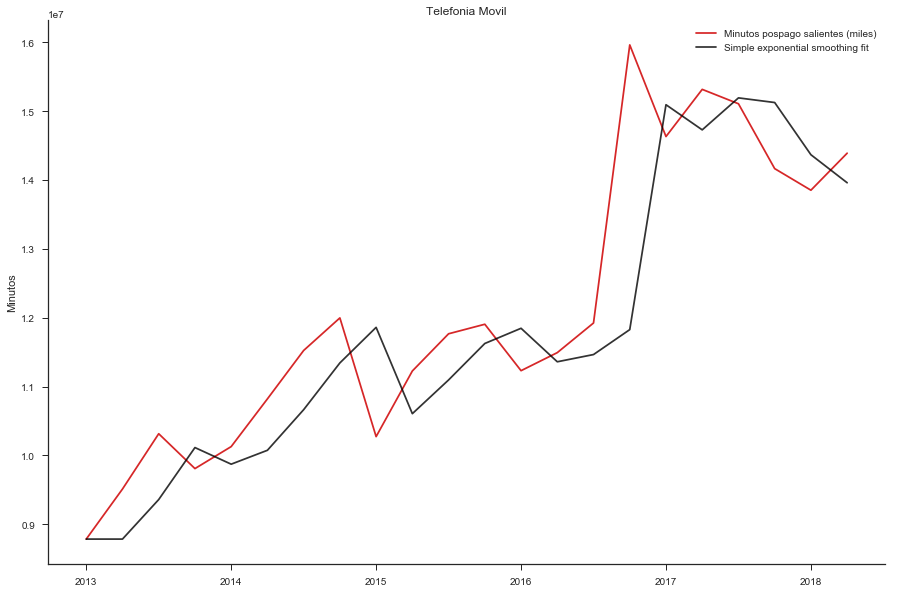

In [80]:
fig, ax= plt.subplots(figsize=(15,10))
y.plot(color=red, label='Minutos pospago salientes (miles)')
fitted_ses.plot(color='black', label='Simple exponential smoothing fit', alpha=0.8)
ax.set_xlabel('')
ax.set_ylabel('Minutos')
ax.set_title('Telefonia Movil')
ax.set_xticks([], minor=True) 
plt.legend(loc='best')
sns.despine()
plt.show()

## Model diagnostics


In [82]:
resid=y-fitted_ses # model_ses.resid isn't a panda.Series, so no index, no plot

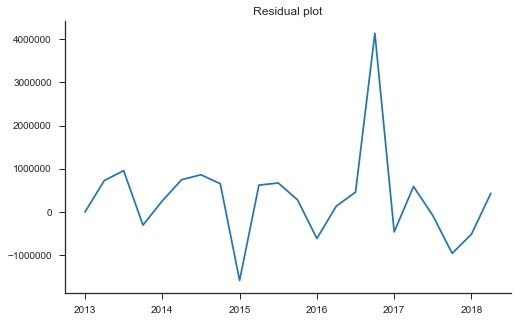

In [83]:
fig, ax= plt.subplots(figsize=(8,5))
resid.plot(color=blue)
ax.set_xlabel('')
ax.set_xticks([], minor=True) 
ax.set_title('Residual plot')
sns.despine()
plt.show()

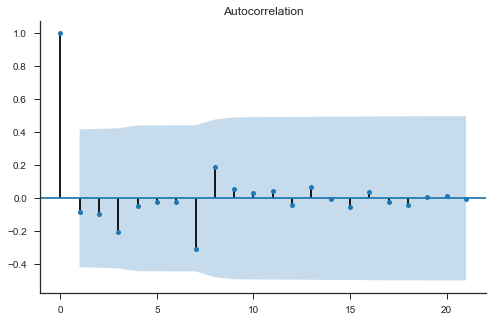

In [93]:
fig, ax = plt.subplots(figsize=(8,5))
sm.graphics.tsa.plot_acf(resid, lags=21, ax=ax)
sns.despine()
plt.show()

/home/fpalacios/miniconda3/envs/diplodatos-ayv/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/fpalacios/miniconda3/envs/diplodatos-ayv/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


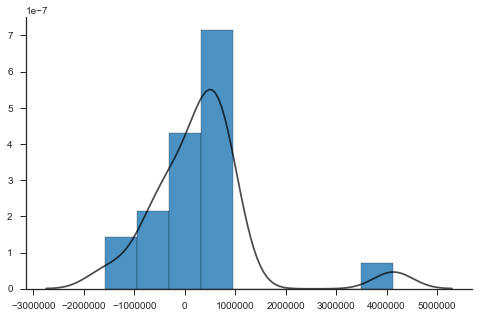

In [94]:
def hist(series):
    fig, ax= plt.subplots(figsize=(8,5))
    sns.distplot(series, ax=ax, hist_kws={'alpha': 0.8, 'edgecolor':'black', 'color': blue},  
                 kde_kws={'color': 'black', 'alpha': 0.7})
    sns.despine()
    return fig, ax

hist(resid)
plt.show()

## Model validation

In [134]:
# Real time forecasting - use it as a template - expanding window

validation=y['2016Q1':].index # the validation period is Q3 2014 onwards
start = y.index.get_loc('2016Q1') # numerical index corresponding to Q4 2014

pred1 = []
pred2 = []
actual= []
for i in range(start, len(y)):
    
    actual.append(y.iloc[i]) # actual value
    
    pred1.append(y.iloc[i-1]) # random walk forecast
    
    model = sm.tsa.SimpleExpSmoothing(y.iloc[:i]).fit() 
    pred2.append(model.forecast(1)[0]) # SES forecast

columns=['RW', 'SES', 'Actual']
results_sm = np.vstack([pred1,pred2,actual]).T
results_sm = pd.DataFrame(results_sm, columns=columns, index=validation)
results_sm.tail()

,RW,SES,Actual
2017Q2,14630269.0,1.472014e+07,15315167.0
2017Q3,15315167.0,1.519007e+07,15106275.0
2017Q4,15106275.0,1.512393e+07,14164552.0
2018Q1,14164552.0,1.437360e+07,13851254.0
2018Q2,13851254.0,1.395104e+07,14388755.0


In [135]:
from scipy import stats

table = pd.DataFrame(0.0, index=results_sm.columns[:-1], columns=['RMSE','SE'])
for i in range(2):
    table.iloc[i,0] = sm.tools.eval_measures.rmse(results_sm.iloc[:,i], results_sm.iloc[:,-1])
    table.iloc[i,1] = (results_sm.iloc[:,i] - results_sm.iloc[:,-1]).sem()
table.round(3)

,RMSE,SE
RW,1434067.548,470798.727
SES,1466072.773,482894.151


## Forecast

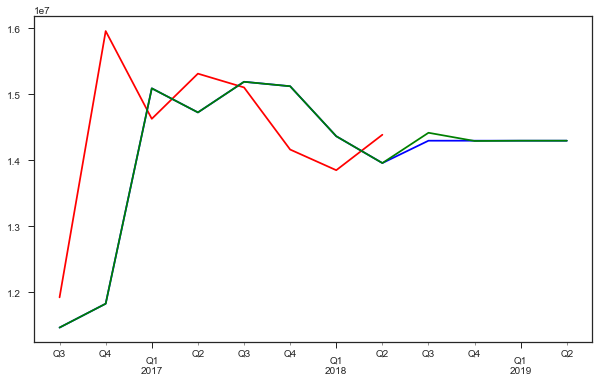

In [137]:
h=4
w=h*2
data = y
model = sm.tsa.SimpleExpSmoothing
pred_index = y.index[-1] + np.array(range(1,h+1))
pred_rolling = pd.Series(0,index=pred_index)
pred_expanding = pd.Series(0,index=pred_index)
orig_fit = None
for i in range(0,h):
    current = pd.concat([data, pred_expanding.head(i)])
    expanding = model(current).fit()
    if i==0:
        orig_fit = expanding.fittedvalues
    rolling = model(current.tail(w)).fit()
    pred_expanding.update(expanding.forecast(1))
    pred_rolling.update(rolling.forecast(1))
ax = data[-w:].plot(color='red',figsize=(10,6))
pd.concat([orig_fit[-w:],pred_expanding]).plot(ax=ax,color='blue');
pd.concat([orig_fit[-w:],pred_rolling]).plot(ax=ax,color='green');

In [152]:
pred_expanding

2018Q3    1.429856e+07
2018Q4    1.429856e+07
2019Q1    1.429856e+07
2019Q2    1.429856e+07
Freq: Q-DEC, dtype: float64

In [139]:
pred_rolling

2018Q3    1.441882e+07
2018Q4    1.429426e+07
2019Q1    1.429856e+07
2019Q2    1.429856e+07
Freq: Q-DEC, dtype: float64

In [145]:
orig_fit.tail(-15)

2016Q4    1.182712e+07
2017Q1    1.509234e+07
2017Q2    1.472734e+07
2017Q3    1.519167e+07
2017Q4    1.512422e+07
2018Q1    1.436617e+07
2018Q2    1.395943e+07
Freq: Q-DEC, dtype: float64